# Festive introduction to Traveling Salesman Problem - Neirest Neighbour Algorithm

This notebook is a festive introduction to the Traveling Salesman Problem (TSP) and the Nearest Neighbour Algorithm. The TSP is a classic optimization problem in computer science and operations research. It is a problem that asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?" The TSP is an NP-hard problem, which means that there is no known algorithm that can solve it in polynomial time. However, there are many algorithms that can find approximate solutions to the TSP in a reasonable amount of time. One such algorithm is the Nearest Neighbour Algorithm, which is the focus of this notebook.

You can read more about it [here](https://medium.com/@edgars.garsneks/nn-traveling-salesman-problem-a05df07bd283).

## The Nearest Neighbour Algorithm

The Nearest Neighbour Algorithm is a simple and intuitive algorithm for solving the TSP. The algorithm works as follows:
1. Start at a random city.
2. Visit the nearest unvisited city.
3. Repeat step 2 until all cities have been visited.

The Nearest Neighbour Algorithm is easy to implement and can find good solutions to the TSP in a reasonable amount of time. However, it is not guaranteed to find the optimal solution to the TSP, as it can get stuck in local minima. Let's look at input data for smaller datasets.

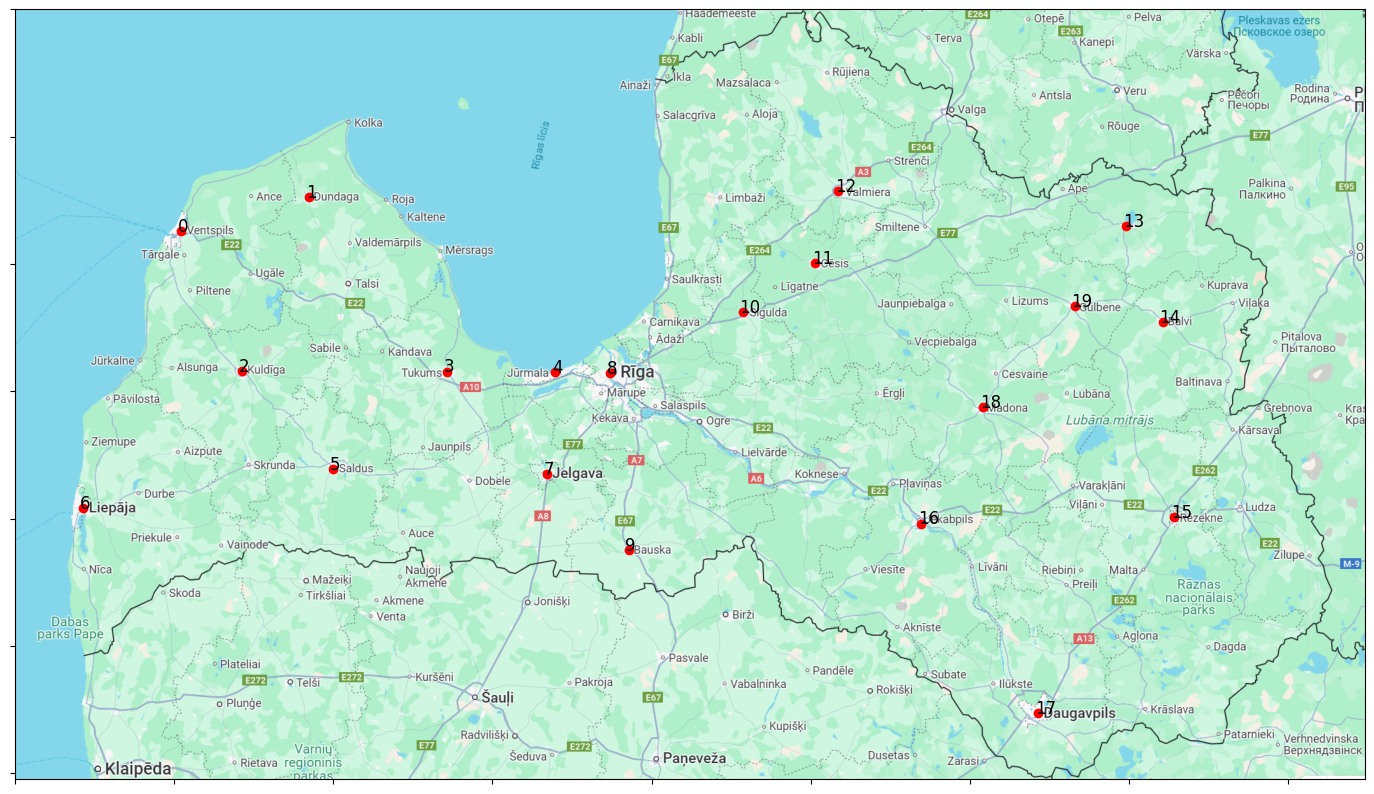

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

map_image = plt.imread('../ga-tsp/images/larger_map.png')

city_locations = np.array([[261, 348], [266, 388], [370, 293], [462, 295], [523, 177], [197, 551], [275, 442], [247, 561], [357, 568], [144, 610], [112, 679], [106, 783], [109,881],  [257,829],  [325,842],  [257,695], [369,717], [499, 722],[369, 414],  [583,297], [606, 326], [527, 369],[525, 431], [667, 380], [520, 531], [574, 539],[679, 569], [610, 822], [642, 688], [716, 739], [849, 570], [935, 571], [835, 730], [921, 604],[972, 644], [1007, 625], [964, 850], [999, 517],  [991, 491],[1022, 423], [1008, 168], [1007, 117], [1197, 115],  [1151, 166], [1277, 99], [1109, 297], [1372, 238], [1293, 285], [1431, 341], [1644, 282], [1257, 399], [1143, 476],  [1192, 436],  [1075, 649], [1132, 698], [1302, 731], [1469, 463], [1404, 525], [1355, 605], [1559, 458], [1665, 466], [1803, 491], [1863, 435], [1911, 461], [1542, 574], [1521, 625], [1653, 602], [1905, 584], [1953, 629], [1915, 660], [1379, 745], [1424, 808],[1337, 881], [1387, 972],[1434, 1046],[1503, 876],[1534, 1063],[1608, 1106],[1778, 1101],[1891, 1142],[1735, 989],[1653, 903],[1677, 880],[1773, 880],[1875, 1002],[1663, 748],[1711, 780],[1821, 797],[1922, 781],[2034, 861],[1746, 341]])

# For quick test of 20 cities
subset = [0, 3, 8, 26, 30, 17, 11, 32, 31, 36, 51, 50, 47, 90, 61, 87, 71, 77, 65, 60]
city_locations = np.array(city_locations[subset])
city_count = len(city_locations)

fig, ax = plt.subplots(figsize=(20, 10))

def plotMap(ax):
    ax.imshow(map_image)
    ax.scatter(city_locations[:, 0], city_locations[:, 1], c='r', marker='o')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    for i in range(city_count):
        ax.text(city_locations[i, 0]- 5, city_locations[i, 1] - 0, i, fontsize=12)

plotMap(ax)

Given cities are listed as 2D points we can precalculate distance matrix between all cities to have a faster lookup.

In [19]:


def distance(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def get_distance_matrix(cities):
    n = len(cities)
    distances = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            distances[i][j] = distance(cities[i], cities[j])

    return distances

def total_distance(path, distance_matrix):
    total_distance = 0

    for i in range(len(path) - 1):
        total_distance += distance_matrix[path[i]][path[i + 1]]

    return total_distance + distance_matrix[path[-1]][path[0]]


Now to implement the Nearest Neighbour Algorithm

In [20]:
def tsp_nn(distances, starting_city):
    path = [starting_city]

    for _ in range(1, len(distances)):
        current = path[-1]
        next = None
        for j in range(len(distances)):
            if j in path:
                continue
            if next is None or distances[current][j] < distances[current][next]:
                next = j
        path.append(next)

    return path

Now to calculate shortest path

In [21]:
distance_matrix = get_distance_matrix(city_locations)
path = tsp_nn(distance_matrix, 0)

And visualize the path

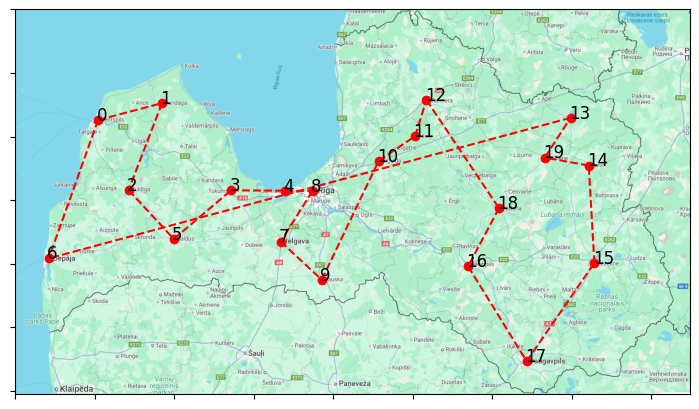

In [22]:
def plot_solution(ax, chromosome, style='r--'):
    plotMap(ax)
    return plot_path(ax,chromosome, style)

def plot_path(ax, chromosome, style='r--'):
    for i in range(len(chromosome) - 1): 
        city_a = chromosome[i]
        city_b = chromosome[i + 1]
        ax.plot([city_locations[city_a][0], city_locations[city_b][0]], [city_locations[city_a][1], city_locations[city_b][1]], style)

    first_city = chromosome[0]
    last_city = chromosome[-1]
    
    return ax.plot([city_locations[first_city][0], city_locations[last_city][0]], [city_locations[first_city][1], city_locations[last_city][1]], style)

fig, ax = plt.subplots(figsize=(10, 5))
plot_solution(ax, path)

It can be seen that it is not optimal route, results differs from the city we are starting from. Let's compute path from all cities and choose the shortest one.

Starting from 02 = 1311.25km [2, 5, 3, 4, 8, 7, 9, 10, 11, 12, 18, 16, 17, 15, 14, 19, 13, 1, 0, 6]


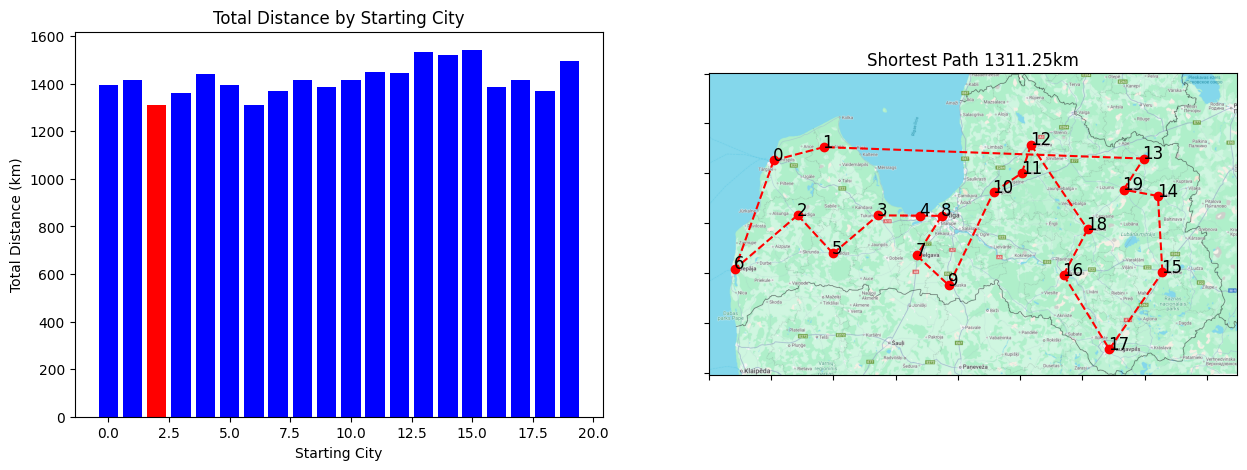

In [23]:
distances = []
for i in range(city_count):
    path = tsp_nn(distance_matrix, i)
    distances.append(total_distance(path, distance_matrix) * 0.22)

shortest = min(range(city_count), key=lambda x: distances[x])
shortest_path = tsp_nn(distance_matrix, shortest)
print(f"Starting from {shortest:02d} = {distances[shortest]:.2f}km {shortest_path}")

colors = ['b'] * city_count
colors[shortest] = 'r'

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_xlabel('Starting City')
ax[0].set_ylabel('Total Distance (km)')
ax[0].set_title('Total Distance by Starting City')
ax[0].bar(range(city_count), distances, color=colors)

plotMap(ax[1])
ax[1].set_title(f'Shortest Path {distances[shortest]:.2f}km')
plot_path(ax[1], shortest_path)

Now to apply same thing for larger dataset.

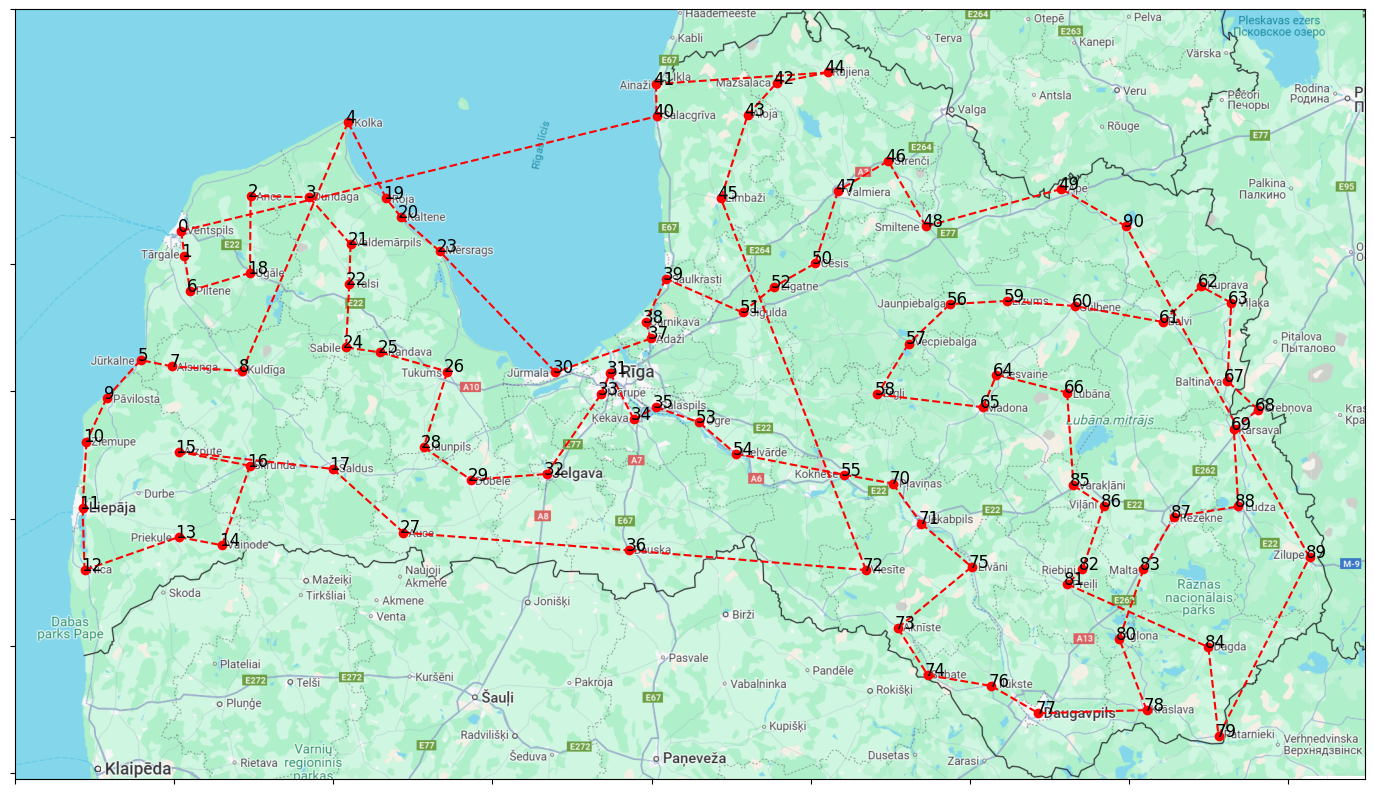

In [24]:
city_locations = np.array([[261, 348], [266, 388], [370, 293], [462, 295], [523, 177], [197, 551], [275, 442], [247, 561], [357, 568], [144, 610], [112, 679], [106, 783], [109,881],  [257,829],  [325,842],  [257,695], [369,717], [499, 722],[369, 414],  [583,297], [606, 326], [527, 369],[525, 431], [667, 380], [520, 531], [574, 539],[679, 569], [610, 822], [642, 688], [716, 739], [849, 570], [935, 571], [835, 730], [921, 604],[972, 644], [1007, 625], [964, 850], [999, 517],  [991, 491],[1022, 423], [1008, 168], [1007, 117], [1197, 115],  [1151, 166], [1277, 99], [1109, 297], [1372, 238], [1293, 285], [1431, 341], [1644, 282], [1257, 399], [1143, 476],  [1192, 436],  [1075, 649], [1132, 698], [1302, 731], [1469, 463], [1404, 525], [1355, 605], [1559, 458], [1665, 466], [1803, 491], [1863, 435], [1911, 461], [1542, 574], [1521, 625], [1653, 602], [1905, 584], [1953, 629], [1915, 660], [1379, 745], [1424, 808],[1337, 881], [1387, 972],[1434, 1046],[1503, 876],[1534, 1063],[1608, 1106],[1778, 1101],[1891, 1142],[1735, 989],[1653, 903],[1677, 880],[1773, 880],[1875, 1002],[1663, 748],[1711, 780],[1821, 797],[1922, 781],[2034, 861],[1746, 341]])
city_count = len(city_locations)
distance_matrix = get_distance_matrix(city_locations)

path = tsp_nn(distance_matrix, 0)
fig, ax = plt.subplots(figsize=(20, 10))
plot_solution(ax, path)

Starting from 54 = 2684.90km [54, 53, 35, 34, 33, 31, 37, 38, 39, 51, 52, 50, 47, 46, 48, 56, 57, 58, 55, 70, 71, 75, 73, 74, 76, 77, 78, 80, 83, 87, 88, 69, 68, 67, 63, 62, 61, 60, 59, 64, 65, 66, 85, 86, 82, 81, 84, 79, 89, 90, 49, 44, 42, 43, 45, 40, 41, 23, 20, 19, 21, 22, 24, 25, 26, 28, 29, 32, 30, 36, 27, 17, 16, 15, 13, 14, 12, 11, 10, 9, 5, 7, 8, 6, 1, 0, 2, 3, 4, 18, 72]


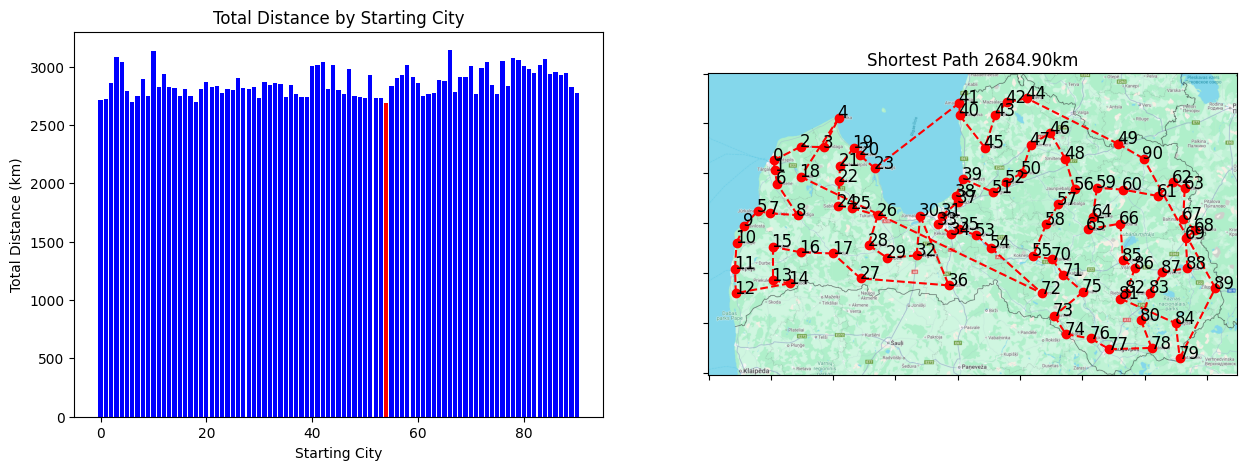

In [38]:
distances = []
for i in range(city_count):
    path = tsp_nn(distance_matrix, i)
    distances.append(total_distance(path, distance_matrix) * 0.22)

shortest = min(range(city_count), key=lambda x: distances[x])
shortest_path = tsp_nn(distance_matrix, shortest)
print(f"Starting from {shortest:02d} = {distances[shortest]:.2f}km {shortest_path}")

colors = ['b'] * city_count
colors[shortest] = 'r'

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_xlabel('Starting City')
ax[0].set_ylabel('Total Distance (km)')
ax[0].set_title('Total Distance by Starting City')
ax[0].bar(range(city_count), distances, color=colors)

plotMap(ax[1])
ax[1].set_title(f'Shortest Path {distances[shortest]:.2f}km')
plot_path(ax[1], shortest_path)

If we compare to some optimal route found by Genetic Algorithm

GA Distance: 2307.58km


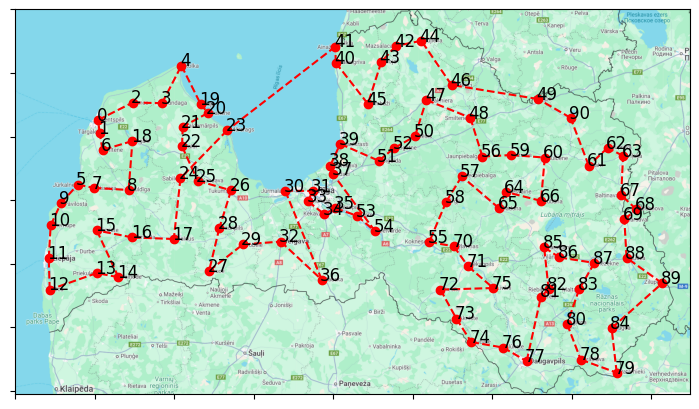

In [52]:
ga_path = [40, 41, 23, 24, 17, 16, 15, 14, 13, 12, 11, 10, 9, 5, 7, 8, 18, 6, 1, 0, 2, 3, 4, 19, 20, 21, 22, 25, 26, 28, 27, 29, 32, 36, 30, 31, 33, 34, 35, 53, 54, 37, 38, 39, 51, 52, 50, 47, 48, 56, 59, 60, 66, 64, 65, 57, 58, 55, 70, 71, 75, 72, 73, 74, 76, 77, 81, 82, 85, 86, 87, 83, 80, 78, 79, 84, 89, 88, 69, 68, 67, 63, 62, 61, 90, 49, 46, 44, 42, 43, 45]
ga_distance = total_distance(ga_path, distance_matrix) * 0.22
print(f"GA Distance: {ga_distance:.2f}km")

fig, ax = plt.subplots(figsize=(10, 5))
plot_solution(ax, ga_path, 'r--')

It can be seen that on average NN will be in 25% of optimal route.

Text(0.5, 0, 'Relative Error (%)')

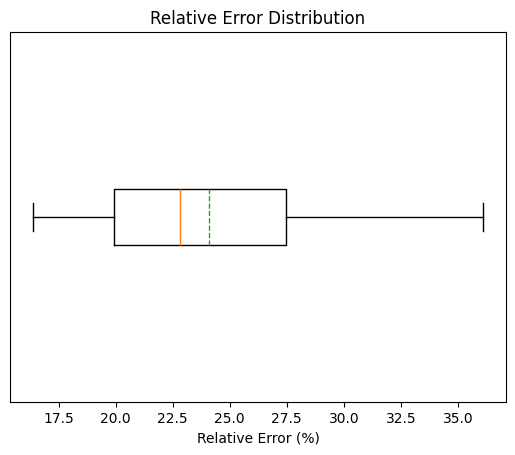

In [ ]:
differences = [(distances[i] - ga_distance) / ga_distance * 100 for i in range(city_count)]

fig, ax = plt.subplots()
ax.boxplot(differences,orientation='horizontal', showmeans=True, meanline=True)
ax.set_yticks([])
ax.set_title('Relative Error Distribution')
ax.set_xlabel('Relative Error (%)')
